In [9]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
spotify = pd.read_csv('spotify.csv')

# Dropping unnecessary columns
spotify = spotify.drop(['Unnamed: 0', 'track_album_id', 'playlist_id'], axis=1)

# Converting date to datetime to visualize datetime
spotify['track_album_release_date'] = pd.to_datetime(spotify['track_album_release_date']) 

# Creating columns 
spotify['duration_sec'] = spotify['duration_ms']/1000

In [11]:
spotify.head()

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_sec
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,pop,dance pop,0.748,...,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0,194.754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,pop,dance pop,0.726,...,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0,162.600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,pop,dance pop,0.675,...,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0,176.616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,Pop Remix,pop,dance pop,0.718,...,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0,169.093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,pop,dance pop,0.650,...,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0,189.052


In [12]:
spotify.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_name', 'track_album_release_date', 'playlist_name',
       'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'duration_sec'],
      dtype='object')

In [13]:
spotify['loudness'].describe()

count    32833.000000
mean        -6.719499
std          2.988436
min        -46.448000
25%         -8.171000
50%         -6.166000
75%         -4.645000
max          1.275000
Name: loudness, dtype: float64

In [14]:
spotify['track_artist'].unique()

array(['Ed Sheeran', 'Maroon 5', 'Zara Larsson', ...,
       'Ferry Corsten feat. Jenny Wahlstrom', 'Tegan and Sara', 'Mat Zo'],
      dtype=object)

## Functions and Visualization

In [15]:
def distplots(column, artist1, artist2):

    '''
    Display overlapping histograms of some attribute of music of two different artists.
    
    Parameters:
    column - the attribute to be compared.
    artist1, artist2 - two artists from the spotify table.
    '''
    
    if artist1 not in spotify['track_artist'].unique() or artist2 not in spotify['track_artist'].unique():
        return ("Unable to plot graphs: artist(s) not found.")
    
    plt.figure(figsize=(10, 5))
    
    artist1_df = spotify[spotify['track_artist'] == artist1]
    artist2_df = spotify[spotify['track_artist'] == artist2]
   
    sns.distplot(artist1_df[column], label = artist1)
    sns.distplot(artist2_df[column], label = artist2)
    
    plt.legend()

In [16]:
# distplots('loudness', 'Katy')

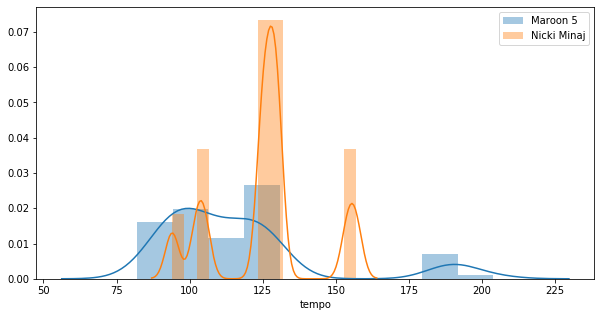

In [17]:
distplots('tempo', 'Maroon 5', 'Nicki Minaj')

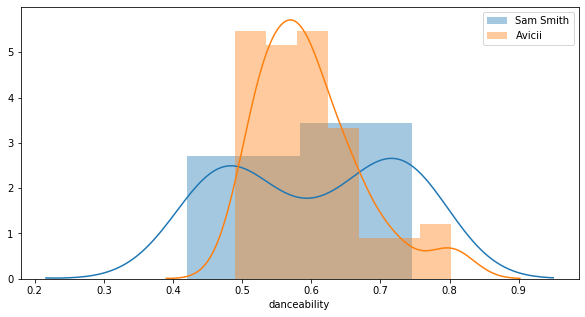

In [18]:
distplots('danceability', 'Sam Smith', 'Avicii')

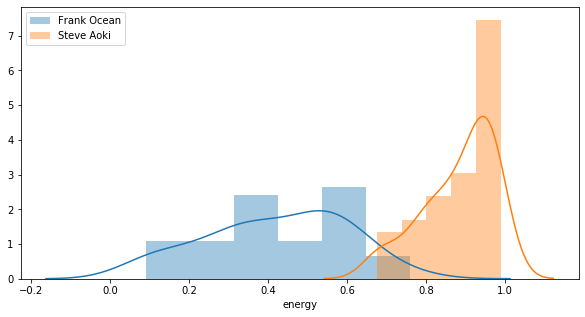

In [19]:
distplots('energy', 'Frank Ocean', 'Steve Aoki')

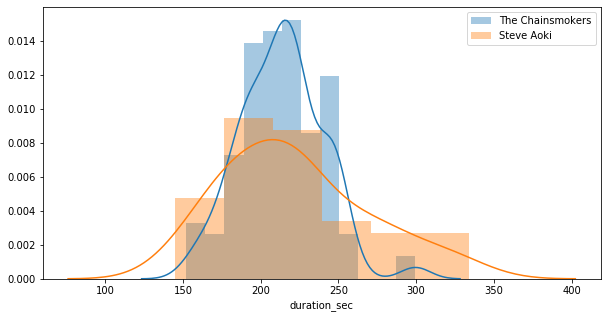

In [20]:
distplots('duration_sec', 'The Chainsmokers', 'Steve Aoki')

# Analyzing Playlist Popularity by Track

In [21]:
names = spotify['playlist_name'].unique()
popularities = []
count = []

for playlist in names:
    subset = spotify[spotify['playlist_name'] == playlist]
    popularities.append(subset['track_popularity'].sum())
    count.append(len(subset))
    

In [22]:
playlist_pop = pd.DataFrame({'Playlist Name': names, 
              'Aggregate Popularity': popularities,
              'Number of Tracks': count})
playlist_pop.head()

,Playlist Name,Aggregate Popularity,Number of Tracks
0,Pop Remix,4174,70
1,Dance Pop,8380,138
2,Dance Room,3355,56
3,Cardio,2641,49
4,Dance Pop Hits,4051,63


In [23]:
playlist_pop.sort_values(by='Aggregate Popularity', ascending=False).head()

,Playlist Name,Aggregate Popularity,Number of Tracks
253,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,20547,247
193,Permanent Wave,13261,244
63,Indie Poptimism,13107,308
321,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,12670,189
15,Ultimate Indie Presents... Best Indie Tracks o...,11840,198


In [24]:
playlist_pop.sort_values(by='Number of Tracks', ascending=False).head()

,Playlist Name,Aggregate Popularity,Number of Tracks
63,Indie Poptimism,13107,308
253,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,20547,247
193,Permanent Wave,13261,244
208,Hard Rock Workout,8713,219
15,Ultimate Indie Presents... Best Indie Tracks o...,11840,198


In [25]:
playlist_pop['Proportion'] = playlist_pop['Aggregate Popularity']/playlist_pop['Number of Tracks']

In [26]:
playlist_pop.sort_values(by='Proportion', ascending=False).head()
# Can do this with groupby

,Playlist Name,Aggregate Popularity,Number of Tracks,Proportion
253,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,20547,247,83.186235
73,RapCaviar,3985,50,79.700000
302,Most Popular 2020 TOP 50,3808,48,79.333333
19,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,7913,100,79.130000
261,Baila Reggaeton,3885,50,77.700000


In [29]:
# Further visualization

artists = spotify['track_artist'].unique()
popular_artists = []
count_artists = []

for artist in artists:
    subset = spotify[spotify['track_artist'] == artist]
    count_artists.append(len(subset))
    
    
popular_artists = pd.DataFrame({'Artist': artists, 
              'Number of Tracks': count_artists})

popular_artists

,Artist,Number of Tracks
0,Ed Sheeran,69
1,Maroon 5,71
2,Zara Larsson,28
3,The Chainsmokers,123
4,Lewis Capaldi,21
...,...,...
10688,The Cataracs,1
10689,Qubicon,1
10690,Ferry Corsten feat. Jenny Wahlstrom,1
10691,Tegan and Sara,1


In [32]:
# top 10 artists
popular_artists.sort_values('Number of Tracks', ascending=False).head(10)

,Artist,Number of Tracks
11,Martin Garrix,161
1053,Queen,136
3,The Chainsmokers,123
13,David Guetta,110
1215,Don Omar,102
1161,Drake,100
93,Dimitri Vegas & Like Mike,93
36,Calvin Harris,91
132,Hardwell,84
27,Kygo,83
